In [2]:
import sys
sys.path.append('/Users/vdk/GeneveWork/Code/calibpipe-main-calibpipe/')
from astropy.io import ascii
import numpy as np
import pandas as pd
import matplotlib
from seaborn import histplot
import csv
import scipy
import matplotlib.pyplot as plt
import random
import copy
from os import path, makedirs
from astropy.coordinates import SkyCoord
from astropy.table import Table
import astropy.units as u
from ctapipe.containers import MuonEfficiencyContainer
from ctapipe.coordinates import CameraFrame, TelescopeFrame
from ctapipe.io import EventSource, EventSeeker
from ctapipe.core import TelescopeComponent
from ctapipe.core.traits import (
    List,
    Int,
    FloatTelescopeParameter,
    TelescopeParameter,
    Unicode,
)
from ctapipe.image.cleaning import tailcuts_clean
from ctapipe.image.muon import MuonRingFitter, MuonIntensityFitter
from traitlets.config import Config
from ctapipe.image import ImageProcessor
from ctapipe.image.muon import MuonProcessor
from ctapipe.visualization import CameraDisplay
from ctapipe.instrument import CameraGeometry
from ctapipe.calib import CameraCalibrator
from traitlets.config.loader import Config, FileConfigLoader, JSONFileConfigLoader
import pathlib
from calibpipe.throughput import MuonCalibrator
from traitlets.config import Config
from astropy.time import Time
from astropy.coordinates import EarthLocation,SkyCoord, AltAz 
from traitlets.config import Config






TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


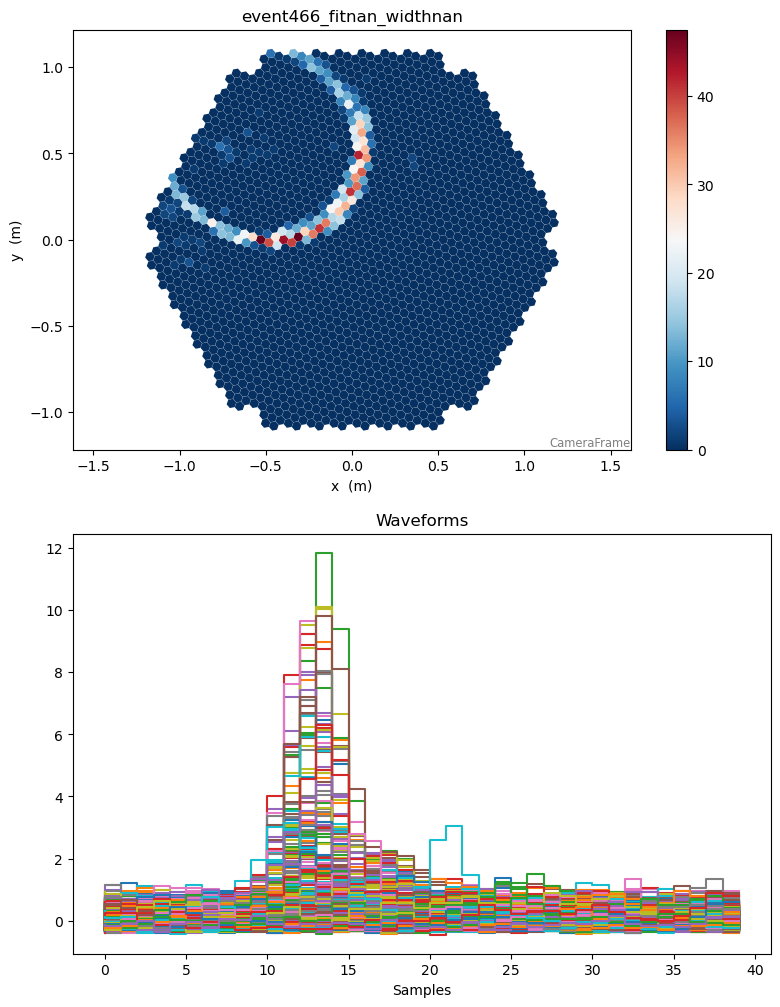

In [3]:
k = 6
event_number = 466
teln = 1
filename = f'/Users/vdk/Software/sim_run_folder/output_prod_v12/corsika_theta_28.4_az_182.75_run{k}.simtel.gz'
source = EventSource(filename, max_events=9000)
event_iterator = iter(source)

for i,j in enumerate(event_iterator):
    if i == event_number:
        image_processor = ImageProcessor(source.subarray)
        muon_processor = MuonProcessor(source.subarray)
        calib = CameraCalibrator(image_extractor_type="GlobalPeakWindowSum",subarray = source.subarray)
        calib(j)
        image_processor(j)
        muon_processor(j)
        event = j
        fig, axes = plt.subplots(2, 1, sharex=False, gridspec_kw={'height_ratios': [1, 1]}, figsize=(9,12))
        fig.subplots_adjust(hspace=0.2)
        ax = axes[0]
        camgeom = source.subarray.tel[1].camera.geometry
        title=f"event{event_number}_fit{round(j.muon.tel[teln].efficiency.optical_efficiency,3)}_width{round(j.muon.tel[teln].efficiency.width.to_value(),3)}"
        disp = CameraDisplay(camgeom,title=title, ax = ax)
        #disp.image = event.r1.tel[teln].waveform[:,11]
        #disp.image = event.dl0.tel[teln].waveform[:,11]
        disp.image = j.simulation.tel[teln].true_image #.sum(axis=1)
        disp.cmap = plt.cm.RdBu_r
        disp.add_colorbar()
        disp.set_limits_percent(95)
        bx = axes[1]
        for pix_id in range(0,1855):
            #bx.plot(j.r0.tel[teln].waveform[0][pix_id], label="pix {}".format(pix_id), drawstyle='steps')
            bx.plot(j.r1.tel[teln].waveform[pix_id], label="pix {}".format(pix_id), drawstyle='steps')
        #bx.set_ylabel("ADC counts")
        bx.set_xlabel("Samples")
        bx.set_title("Waveforms")
        plt.show()
        break




TelescopeParameter type argument 'MST_*' did not match any known telescope types
TelescopeParameter type argument 'SST_1M_*' did not match any known telescope types


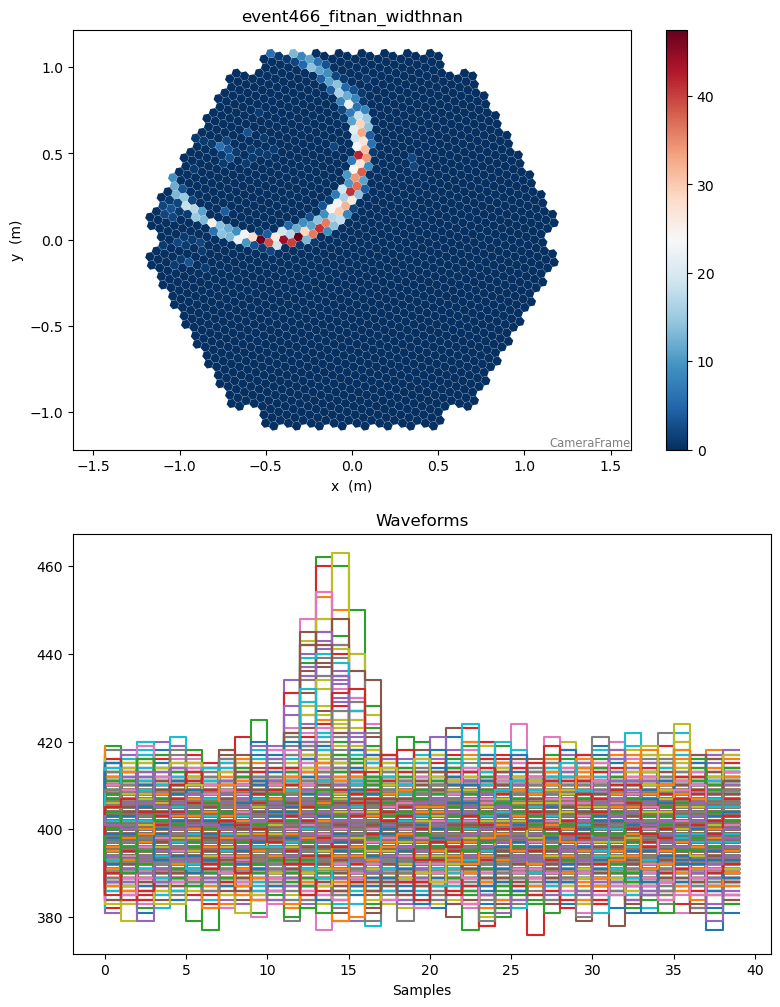

In [4]:
k = 6
event_number = 466
teln = 1
filename = f'/Users/vdk/Software/sim_run_folder/output_prod_v12/corsika_theta_28.4_az_182.75_run{k}.simtel.gz'
source = EventSource(filename, max_events=9000)
event_iterator = iter(source)

for i,j in enumerate(event_iterator):
    if i == event_number:
        image_processor = ImageProcessor(source.subarray)
        muon_processor = MuonProcessor(source.subarray)
        calib = CameraCalibrator(image_extractor_type="GlobalPeakWindowSum",subarray = source.subarray)
        calib(j)
        image_processor(j)
        muon_processor(j)
        event = j
        fig, axes = plt.subplots(2, 1, sharex=False, gridspec_kw={'height_ratios': [1, 1]}, figsize=(9,12))
        fig.subplots_adjust(hspace=0.2)
        ax = axes[0]
        camgeom = source.subarray.tel[1].camera.geometry
        title=f"event{event_number}_fit{round(j.muon.tel[teln].efficiency.optical_efficiency,3)}_width{round(j.muon.tel[teln].efficiency.width.to_value(),3)}"
        disp = CameraDisplay(camgeom,title=title, ax = ax)
        #disp.image = event.r1.tel[teln].waveform[:,11]
        #disp.image = event.dl0.tel[teln].waveform[:,11]
        disp.image = j.simulation.tel[teln].true_image #.sum(axis=1)
        disp.cmap = plt.cm.RdBu_r
        disp.add_colorbar()
        disp.set_limits_percent(95)
        bx = axes[1]
        for pix_id in range(0,1855):
            #bx.plot(j.r0.tel[teln].waveform[0][pix_id], label="pix {}".format(pix_id), drawstyle='steps')
            bx.plot(j.r0.tel[teln].waveform[1][pix_id], label="pix {}".format(pix_id), drawstyle='steps')
        #bx.set_ylabel("ADC counts")
        bx.set_xlabel("Samples")
        bx.set_title("Waveforms")
        plt.show()
        break




In [17]:
event.mon.tel[1].calibration.unusable_pixels

Text(0, 0.5, 'Time sample of the peak')

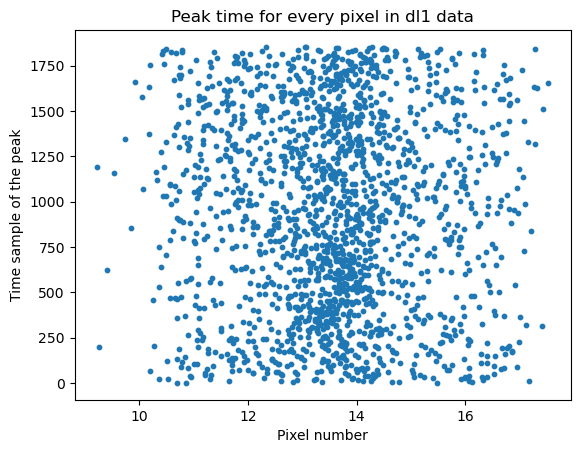

In [225]:
n_pixels = [i for i in range(event.dl0.tel[teln].waveform.shape[-2])]
n_timesamples = [i for i in range(event.dl0.tel[teln].waveform.shape[-1])]
plt.scatter(event.dl1.tel[teln].peak_time, n_pixels, s = 10)
plt.title("Peak time for every pixel in dl1 data")
plt.xlabel("Pixel number")
plt.ylabel("Time sample of the peak")
#plt.savefig(f"/Users/vdk/PeakTime_DL1_event{str(k)+str(0)+str(event_number)}")

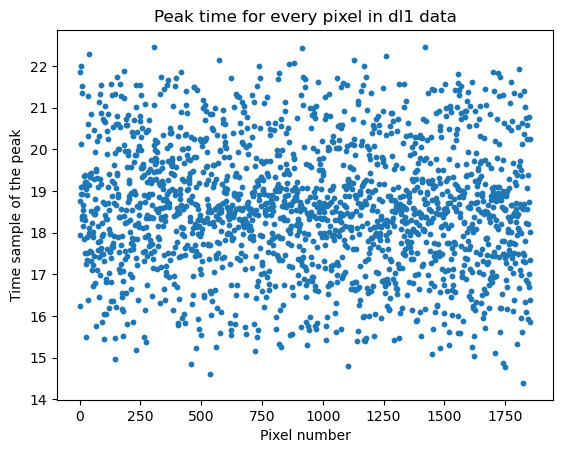

In [227]:
n_pixels = [i for i in range(event.dl0.tel[teln].waveform.shape[-2])]
n_timesamples = [i for i in range(event.dl0.tel[teln].waveform.shape[-1])]
plt.scatter(n_pixels,event.dl1.tel[teln].peak_time, s = 10)
plt.title("Peak time for every pixel in dl1 data")
plt.xlabel("Pixel number")
plt.ylabel("Time sample of the peak")
plt.savefig(f"/Users/vdk/PeakTime_DL1_event{str(k)+str(0)+str(event_number)}")

Text(0.5, 1.0, 'Hist of peak times for all pixels in dl1')

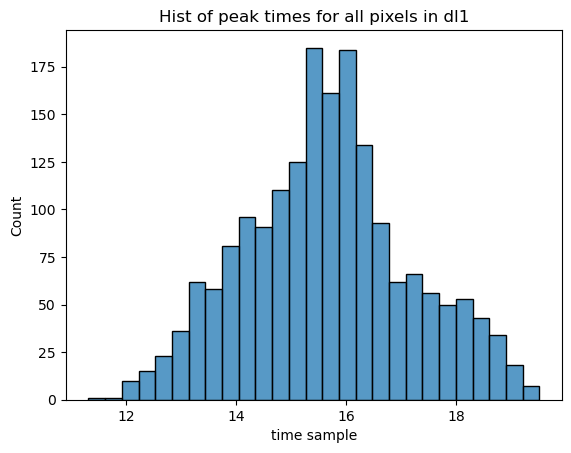

In [181]:
histplot(event.dl1.tel[teln].peak_time)
plt.xlabel("time sample")
plt.title("Hist of peak times for all pixels in dl1")

In [175]:
peak_arr = np.empty(1855, dtype = int)
np.argmax(event.dl0.tel[teln].waveform, axis = 1, out = peak_arr)

array([27,  5, 21, ..., 30, 13, 34])

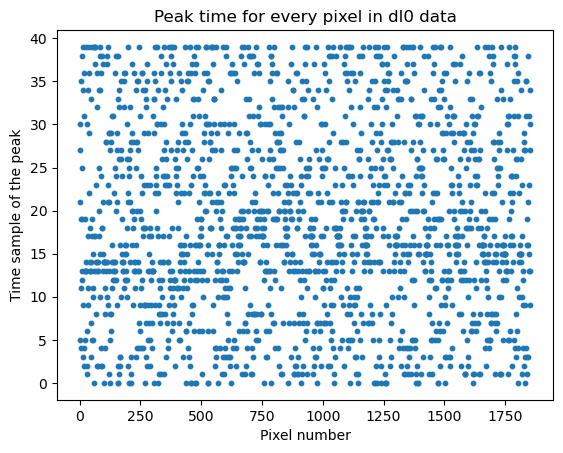

In [179]:
plt.scatter(n_pixels, peak_arr, s = 10)
plt.xlabel("Pixel number")
plt.ylabel("Time sample of the peak")
plt.title("Peak time for every pixel in dl0 data")
#plt.ylim(10,30)
plt.savefig(f"/Users/vdk/PeakTime_DL0_event{str(k)+str(0)+str(event_number)}")

Axes(0.125,0.11;0.775x0.77)


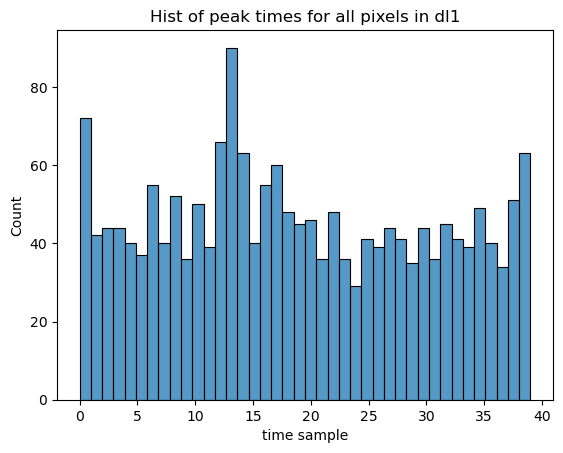

In [229]:
t = histplot(peak_arr, bins = 40)
plt.xlabel("time sample")
plt.title("Hist of peak times for all pixels in dl1")
print(t)

In [208]:
event.dl0.tel[teln].waveform[0]

array([-1.71280667e-01, -1.49949729e-01, -2.13942572e-01, -1.07287824e-01,
       -3.31262797e-01, -1.49949729e-01,  4.20288332e-02,  1.91345483e-01,
        3.72658581e-01,  4.57982361e-01,  3.40662152e-01,  4.15320486e-01,
        4.15320486e-01,  3.40662152e-01,  2.66003817e-01,  3.08665723e-01,
        6.60626411e-01,  4.79313314e-01,  4.04655010e-01,  2.55338341e-01,
        1.70014545e-01,  1.38018116e-01,  2.76669294e-01,  8.46907347e-02,
       -1.17953293e-01,  3.13633606e-02, -6.33067335e-04,  3.13633606e-02,
        5.26943095e-02, -4.32949699e-02, -5.39604425e-02,  8.46907347e-02,
        1.80680022e-01,  1.91345483e-01,  3.19331199e-01,  4.57982361e-01,
        6.49960935e-01,  5.11309743e-01,  3.72658581e-01,  3.72658581e-01],
      dtype=float32)

In [163]:
np.sum(event.r1.tel[teln].waveform, axis = 0)

array([-15.634187 , -13.028241 , -21.864037 , -15.204483 ,  -6.5105834,
         7.7364917,   6.017371 ,   8.652285 ,   3.2387516,  14.758459 ,
        29.797964 ,  79.22473  , 179.697    , 267.5622   , 279.11932  ,
       227.43414  , 256.07138  , 382.05435  , 487.3653   , 451.52713  ,
       312.6593   , 195.3482   , 125.80033  ,  91.72924  ,  60.0132   ,
        50.402267 ,  35.83975  ,  35.19175  ,  33.584133 ,  19.135284 ,
        15.125959 ,   4.7627544,  29.365799 ,  21.465939 ,   9.676649 ,
        12.632799 ,  25.240393 ,  12.782881 ,   7.705388 ,  -7.7731333],
      dtype=float32)

In [145]:
np.max(event.r1.tel[teln].waveform, axis = 0)

array([ 1.8515117 ,  1.2783303 ,  1.0612159 ,  1.0834979 ,  0.83911234,
        0.93608284,  1.0843678 ,  1.1484921 ,  1.0301601 ,  1.2417032 ,
        3.1716893 ,  6.706383  ,  8.712268  , 10.746412  , 11.330606  ,
       11.188771  , 11.220599  , 19.308908  , 25.277401  , 30.897285  ,
       23.22398   , 12.7559395 ,  7.088424  ,  7.0343866 ,  5.82395   ,
        3.6840696 ,  2.3922036 ,  1.727917  ,  1.4685377 ,  1.2964424 ,
        1.4860396 ,  1.0373726 ,  0.9826507 ,  1.0707632 ,  1.3601507 ,
        1.3492283 ,  1.1549847 ,  1.0694312 ,  0.9155838 ,  1.0768229 ],
      dtype=float32)

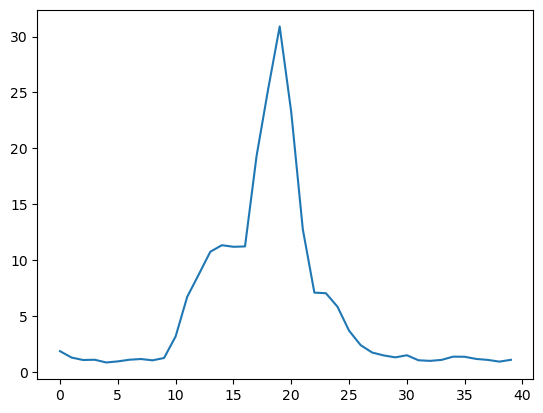

In [146]:
plt.plot(n_timesamples, np.max(event.r1.tel[teln].waveform, axis = 0))

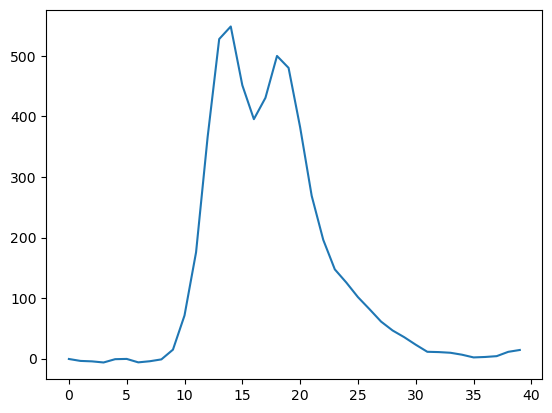

In [147]:
plt.plot(n_timesamples, np.sum(event.r1.tel[teln].waveform, axis = 0))

In [79]:
event.dl1.tel[teln].parameters

ctapipe.containers.ImageParametersContainer:
                      hillas.*: Hillas Parameters with default None with type
                                <class 'ctapipe.containers.BaseHillasParametersC
                                ontainer'>
                      timing.*: Timing Parameters with default None with type
                                <class 'ctapipe.containers.BaseTimingParametersC
                                ontainer'>
                     leakage.*: Leakage Parameters with default None
               concentration.*: Concentration Parameters with default None
                  morphology.*: Image Morphology Parameters with default None
        intensity_statistics.*: Intensity image statistics with default None
        peak_time_statistics.*: Peak time image statistics with default None
                        core.*: Image direction in the Tilted/Ground Frame with
                                default None

In [91]:
event.dl1.tel[teln].parameters.peak_time_statistics

ctapipe.containers.PeakTimeStatisticsContainer:
                           max: value of pixel with maximum intensity with
                                default nan
                           min: value of pixel with minimum intensity with
                                default nan
                          mean: mean intensity with default nan
                           std: standard deviation of intensity with default nan
                      skewness: skewness of intensity with default nan
                      kurtosis: kurtosis of intensity with default nan

In [93]:
event.dl1.tel[teln].parameters.morphology.n_islands

2

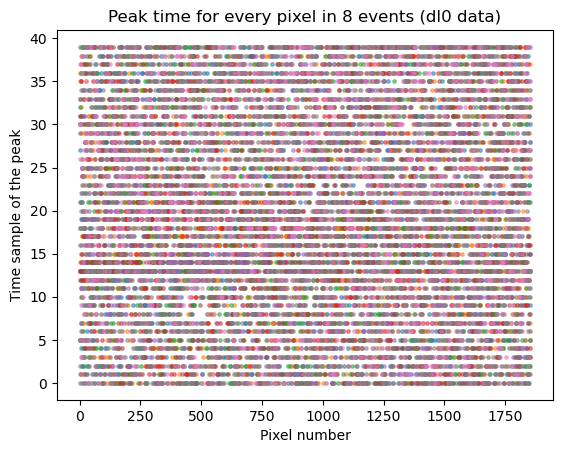

In [240]:
###
###
###
###
###

k = [2,2,9,25,32,22,22,32]
event_number = [223, 438,222,51,64,126,365,298]
tel_arr = [2,3,2,1,1,1,1,3]
work_range = [0,1,2,3,4,5,6,7]

for_hist = []

#filename = f'/Users/vdk/sim_run_folder/output_prod_v12/corsika_theta_28.4_az_182.75_run{k}.simtel.gz'
#source = EventSource(filename, max_events=9000)
#event_iterator = iter(source)

for i in work_range:
    filename = f'/Users/vdk/sim_run_folder/output_prod_v12/corsika_theta_28.4_az_182.75_run{k[i]}.simtel.gz'
    source = EventSource(filename, max_events=9000)
    event_iterator = iter(source)
    n_pixels = [i for i in range(1855)]
    n_timesamples = [i for i in range(40)]
    for n,j in enumerate(event_iterator):
        if n == event_number[i]:
            teln = tel_arr[i]
            #image_processor = ImageProcessor(source.subarray)
            #muon_processor = MuonProcessor(source.subarray)
            #calib = CameraCalibrator(image_extractor_type="GlobalPeakWindowSum",subarray = source.subarray)
            #calib(j)
            #image_processor(j)
            #muon_processor(j)
            event = j
            #fig, axes = plt.subplots(2, 1, sharex=False, gridspec_kw={'height_ratios': [1, 1]}, figsize=(9,12))
            #fig.subplots_adjust(hspace=0.2)
            #ax = axes[0]

            
            #plt.scatter(n_pixels,event.dl1.tel[teln].peak_time, s = 6, alpha = 0.5)
            peak_arr = np.empty(1855, dtype = int)
            np.argmax(event.r1.tel[teln].waveform, axis = 1, out = peak_arr)
            plt.scatter(n_pixels,peak_arr, s = 6, alpha = 0.5)
            
            
            #camgeom = source.subarray.tel[1].camera.geometry
            #title=f"event{event_number[i]}_fit{round(j.muon.tel[teln].efficiency.optical_efficiency,3)}_width{round(j.muon.tel[teln].efficiency.width.to_value(),3)}"
            #disp = CameraDisplay(camgeom,title=title, ax = ax)
            #disp.image = j.simulation.tel[teln].true_image #.sum(axis=1)
            #disp.cmap = plt.cm.RdBu_r
            #disp.add_colorbar()
            #disp.set_limits_percent(95)
            for_hist = np.append(for_hist, peak_arr) 
            #for pix_id in range(0,1855):
                #bx.plot(j.r0.tel[teln].waveform[0][pix_id], label="pix {}".format(pix_id), drawstyle='steps')
            #    bx.plot(j.r1.tel[teln].waveform[pix_id], label="pix {}".format(pix_id), drawstyle='steps')
            #bx.set_ylabel("ADC counts")
            #bx.set_xlabel("Samples")
            #bx.set_title("Waveforms")
            #plt.scatter(n_pixels,event.dl1.tel[teln].peak_time, s = 6, alpha = 0.5)
            #plt.title("Peak time for every pixel in dl1 data")
            #plt.savefig(f"/Users/vdk/PeakTime_DL1_event{str(k)+str(0)+str(event_number)}")
            break


plt.xlabel("Pixel number")
plt.ylabel("Time sample of the peak")
plt.title("Peak time for every pixel in 8 events (dl0 data)")
plt.show()


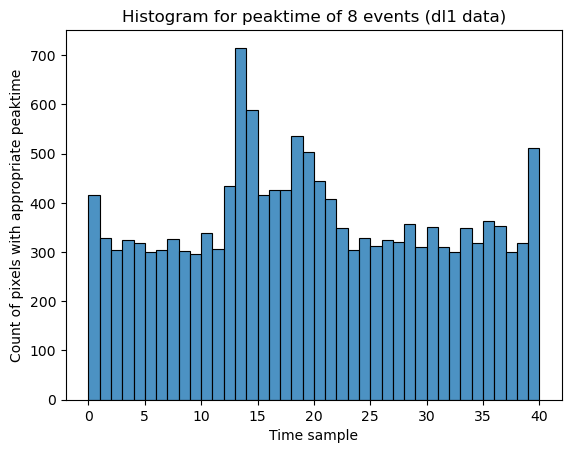

In [241]:
histplot(for_hist, alpha = 0.8, binrange=[0,40], bins = 40)
plt.xlabel("Time sample")
plt.ylabel("Count of pixels with appropriate peaktime")
plt.title("Histogram for peaktime of 8 events (dl1 data)")
#plt.savefig(f"/Users/vdk/Histplot_PeakTime_DL1events")

In [239]:
for_hist

[]